In [2]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import r2_score

In [3]:
import tensorflow as tf
from tensorflow.keras.layers import Dense, Flatten, Layer
from tensorflow.keras.models import Sequential
from tensorflow.keras.losses import mean_squared_error
from tensorflow.keras import backend as K

class RBFLayer(Layer):
    def __init__(self, units, gamma, **kwargs):
        super(RBFLayer, self).__init__(**kwargs)
        self.units = units
        self.gamma = gamma

    def build(self, input_shape):
        # Create a trainable weight variable for the centers of the RBFs
        self.centers = self.add_weight(name='centers',
                                      shape=(self.units, input_shape[-1]),
                                      initializer='uniform',
                                      trainable=True)
        super(RBFLayer, self).build(input_shape)

    def call(self, inputs):
        # Calculate the radial basis functions for each input sample and each RBF center
        diff = K.expand_dims(inputs) - self.centers  # shape: (batch_size, units, input_dim)
        norm = K.sum(K.square(diff), axis=-1)  # shape: (batch_size, units)
        rbf = K.exp(-self.gamma * norm)  # shape: (batch_size, units)

        return rbf

    def compute_output_shape(self, input_shape):
        return input_shape[0], self.units

In [4]:
def training_modelacc(filename):
    # load data
    df = pd.read_csv(filename, delimiter=',')
    # input and output
    X = df.drop(columns=["GOAL","7MSHOT","6MSHOT","9MSHOT","WINGSHOT","PIVOTSHOT","FASTBREAKSHOT"])
    y = df.GOAL
    # dataset splitting
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    # dataset normalization
    scaler = MinMaxScaler()
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)
    # create the model
    model = Sequential()
    model.add(Flatten(input_shape=(6,)))  # Adjust the input shape to (12,)
    model.add(RBFLayer(6, 0.5))
    model.add(Dense(1, activation='linear'))  # Use 'linear' activation for regression
    model.compile(optimizer='rmsprop', loss=mean_squared_error)  # Use mean_squared_error for regression
    # train model
    model.fit(X_train, y_train, batch_size=8, epochs=100)
    # data prediction
    pred_train = model.predict(X_train)
    pred_test = model.predict(X_test)
    # evaluation
    plt.figure(figsize=(11, 5))

    plt.subplot(121)
    plt.scatter(pred_train, y_train, c='r', s=10)
    x1, x2 = plt.xlim()
    y1, y2 = plt.ylim()
    lim = min(x1, y1), min(x2, y2)
    plt.xlim(*lim)
    plt.ylim(*lim)
    plt.plot(lim, lim, 'k--', zorder=-1)
    plt.xlabel("Prediction", fontsize=14)
    plt.ylabel("Actual", fontsize=14)
    plt.title(f"R2_train: {r2_score(y_train, pred_train):.3f}", fontsize=14)

    plt.subplot(122)
    plt.scatter(pred_test, y_test, c='r', s=10)
    x1, x2 = plt.xlim()
    y1, y2 = plt.ylim()
    lim = min(x1, y1), min(x2, y2)
    plt.xlim(*lim)
    plt.ylim(*lim)
    plt.plot(lim, lim, 'k--', zorder=-1)
    plt.xlabel("Prediction", fontsize=14)
    plt.ylabel("Actual", fontsize=14)
    plt.title(f"R2_test: {r2_score(y_test, pred_test):.3f}", fontsize=14);
    plt.show()
    return model
def training_modelshot(filename):
    # load data
    df = pd.read_csv(filename, delimiter=',')
    # input and output
    X = df.drop(columns=["GOAL","7MACC","6MACC","9MACC","WINGACC","PIVOTACC","FASTBREAKACC"])
    y = df.GOAL
    # dataset splitting
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    # dataset normalization
    scaler = MinMaxScaler()
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)
    # create the model
    model = Sequential()
    model.add(Flatten(input_shape=(6,)))  # Adjust the input shape to (12,)
    model.add(RBFLayer(6, 0.5))
    model.add(Dense(1, activation='linear'))  # Use 'linear' activation for regression
    model.compile(optimizer='rmsprop', loss=mean_squared_error)  # Use mean_squared_error for regression
    # train model
    model.fit(X_train, y_train, batch_size=8, epochs=100)
    # data prediction
    pred_train = model.predict(X_train)
    pred_test = model.predict(X_test)
    # evaluation
    plt.figure(figsize=(11, 5))

    plt.subplot(121)
    plt.scatter(pred_train, y_train, c='r', s=10)
    x1, x2 = plt.xlim()
    y1, y2 = plt.ylim()
    lim = min(x1, y1), min(x2, y2)
    plt.xlim(*lim)
    plt.ylim(*lim)
    plt.plot(lim, lim, 'k--', zorder=-1)
    plt.xlabel("Prediction", fontsize=14)
    plt.ylabel("Actual", fontsize=14)
    plt.title(f"R2_train: {r2_score(y_train, pred_train):.3f}", fontsize=14)

    plt.subplot(122)
    plt.scatter(pred_test, y_test, c='r', s=10)
    x1, x2 = plt.xlim()
    y1, y2 = plt.ylim()
    lim = min(x1, y1), min(x2, y2)
    plt.xlim(*lim)
    plt.ylim(*lim)
    plt.plot(lim, lim, 'k--', zorder=-1)
    plt.xlabel("Prediction", fontsize=14)
    plt.ylabel("Actual", fontsize=14)
    plt.title(f"R2_test: {r2_score(y_test, pred_test):.3f}", fontsize=14);
    plt.show()
    return model

Position:  CB.csv
Epoch 1/100
127/127 [==============================] - 1s 1ms/step - loss: 23.0466
Epoch 2/100
127/127 [==============================] - 0s 1ms/step - loss: 16.7533
Epoch 3/100
127/127 [==============================] - 0s 1ms/step - loss: 12.2026
Epoch 4/100
127/127 [==============================] - 0s 974us/step - loss: 9.0773
Epoch 5/100
127/127 [==============================] - 0s 978us/step - loss: 6.6841
Epoch 6/100
127/127 [==============================] - 0s 989us/step - loss: 5.2277
Epoch 7/100
127/127 [==============================] - 0s 997us/step - loss: 4.6416
Epoch 8/100
127/127 [==============================] - 0s 1ms/step - loss: 4.4094
Epoch 9/100
127/127 [==============================] - 0s 1ms/step - loss: 4.2851
Epoch 10/100
127/127 [==============================] - 0s 989us/step - loss: 4.1858
Epoch 11/100
127/127 [==============================] - 0s 918us/step - loss: 4.0971
Epoch 12/100
127/127 [==============================] - 0s 925u

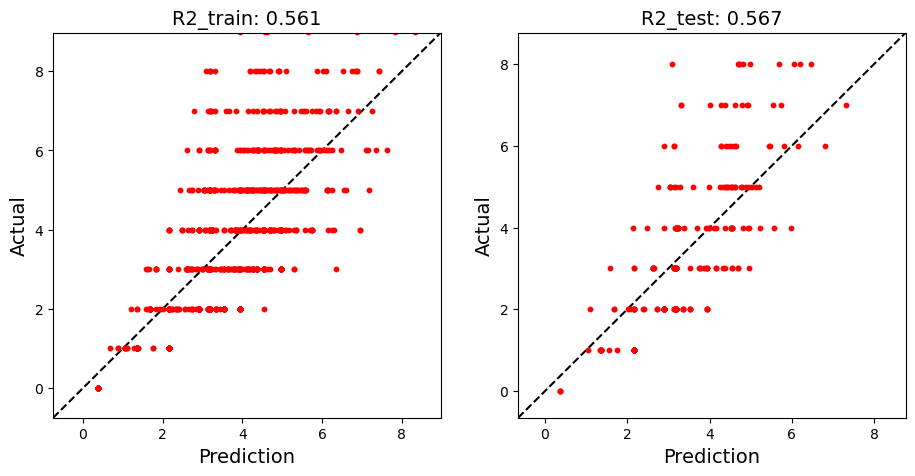


Position:  LB.csv
Epoch 1/100
139/139 [==============================] - 0s 1ms/step - loss: 10.1977
Epoch 2/100
139/139 [==============================] - 0s 1ms/step - loss: 7.7012
Epoch 3/100
139/139 [==============================] - 0s 995us/step - loss: 6.3423
Epoch 4/100
139/139 [==============================] - 0s 1ms/step - loss: 5.5939
Epoch 5/100
139/139 [==============================] - 0s 1ms/step - loss: 5.1414
Epoch 6/100
139/139 [==============================] - 0s 1ms/step - loss: 4.7886
Epoch 7/100
139/139 [==============================] - 0s 1ms/step - loss: 4.5175
Epoch 8/100
139/139 [==============================] - 0s 1ms/step - loss: 4.2966
Epoch 9/100
139/139 [==============================] - 0s 1ms/step - loss: 4.1237
Epoch 10/100
139/139 [==============================] - 0s 1ms/step - loss: 3.9814
Epoch 11/100
139/139 [==============================] - 0s 1ms/step - loss: 3.8473
Epoch 12/100
139/139 [==============================] - 0s 1ms/step - loss

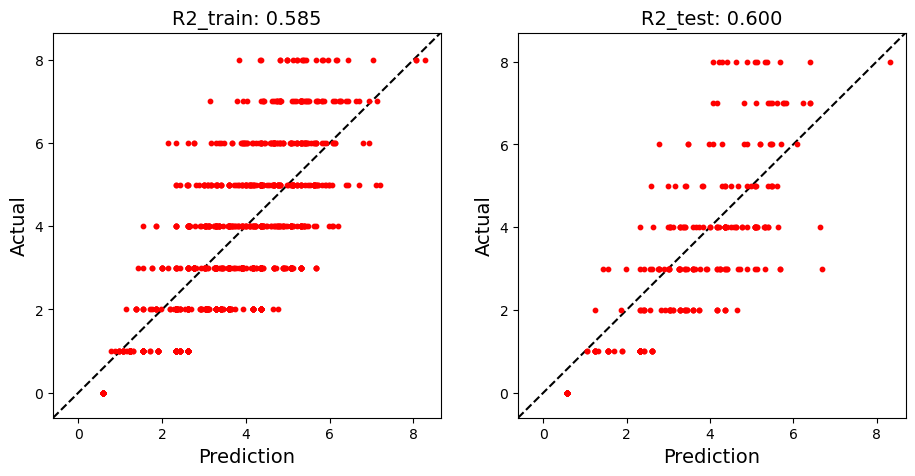


Position:  LW.csv
Epoch 1/100
100/100 [==============================] - 0s 1ms/step - loss: 14.3963
Epoch 2/100
100/100 [==============================] - 0s 1ms/step - loss: 11.8995
Epoch 3/100
100/100 [==============================] - 0s 1ms/step - loss: 10.0669
Epoch 4/100
100/100 [==============================] - 0s 1ms/step - loss: 8.9494
Epoch 5/100
100/100 [==============================] - 0s 1ms/step - loss: 8.0659
Epoch 6/100
100/100 [==============================] - 0s 1ms/step - loss: 7.3969
Epoch 7/100
100/100 [==============================] - 0s 1ms/step - loss: 6.7662
Epoch 8/100
100/100 [==============================] - 0s 986us/step - loss: 6.1824
Epoch 9/100
100/100 [==============================] - 0s 988us/step - loss: 5.6597
Epoch 10/100
100/100 [==============================] - 0s 995us/step - loss: 5.2129
Epoch 11/100
100/100 [==============================] - 0s 985us/step - loss: 4.8353
Epoch 12/100
100/100 [==============================] - 0s 977us/s

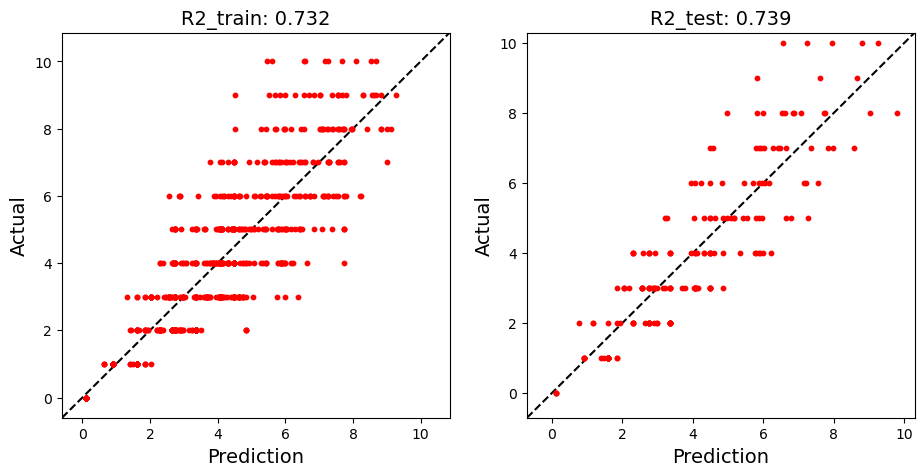


Position:  P.csv
Epoch 1/100
144/144 [==============================] - 1s 1ms/step - loss: 10.4447
Epoch 2/100
144/144 [==============================] - 0s 1ms/step - loss: 6.2705
Epoch 3/100
144/144 [==============================] - 0s 1ms/step - loss: 3.9672
Epoch 4/100
144/144 [==============================] - 0s 1ms/step - loss: 3.0482
Epoch 5/100
144/144 [==============================] - 0s 1ms/step - loss: 2.8164
Epoch 6/100
144/144 [==============================] - 0s 1ms/step - loss: 2.6896
Epoch 7/100
144/144 [==============================] - 0s 1ms/step - loss: 2.5877
Epoch 8/100
144/144 [==============================] - 0s 1ms/step - loss: 2.5029
Epoch 9/100
144/144 [==============================] - 0s 1ms/step - loss: 2.4232
Epoch 10/100
144/144 [==============================] - 0s 1ms/step - loss: 2.3493
Epoch 11/100
144/144 [==============================] - 0s 1ms/step - loss: 2.2804
Epoch 12/100
144/144 [==============================] - 0s 1ms/step - loss: 2

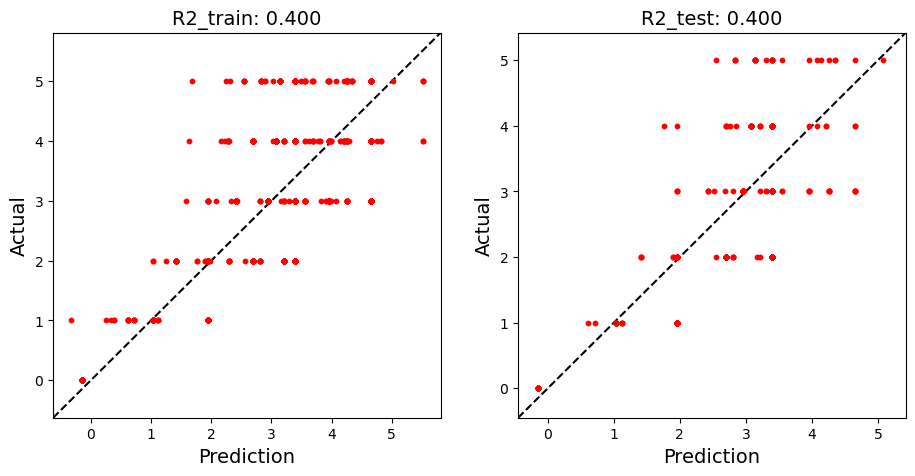


Position:  RB.csv
Epoch 1/100
111/111 [==============================] - 1s 1ms/step - loss: 11.9021
Epoch 2/100
111/111 [==============================] - 0s 1ms/step - loss: 9.6343
Epoch 3/100
111/111 [==============================] - 0s 1ms/step - loss: 8.1551
Epoch 4/100
111/111 [==============================] - 0s 1ms/step - loss: 7.2708
Epoch 5/100
111/111 [==============================] - 0s 1ms/step - loss: 6.7510
Epoch 6/100
111/111 [==============================] - 0s 1ms/step - loss: 6.4509
Epoch 7/100
111/111 [==============================] - 0s 1ms/step - loss: 6.2077
Epoch 8/100
111/111 [==============================] - 0s 984us/step - loss: 5.9933
Epoch 9/100
111/111 [==============================] - 0s 1ms/step - loss: 5.8012
Epoch 10/100
111/111 [==============================] - 0s 1ms/step - loss: 5.6233
Epoch 11/100
111/111 [==============================] - 0s 1ms/step - loss: 5.4476
Epoch 12/100
111/111 [==============================] - 0s 879us/step - lo

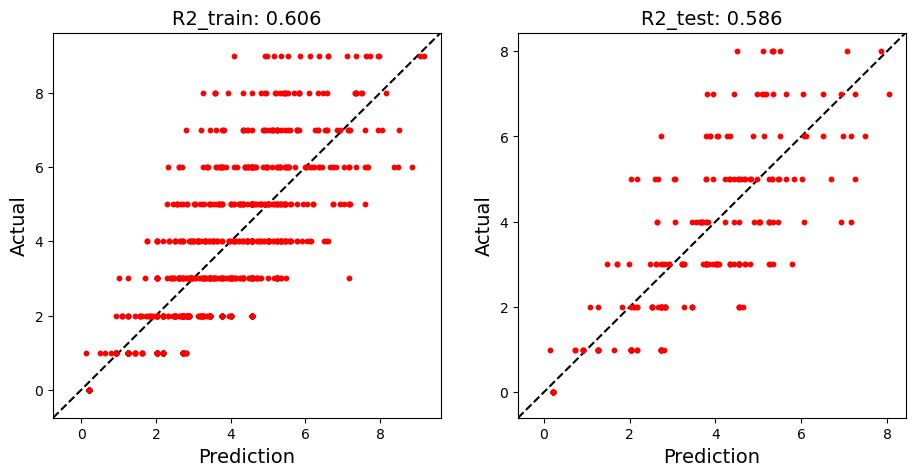


Position:  RW.csv
Epoch 1/100
106/106 [==============================] - 0s 1ms/step - loss: 12.4555
Epoch 2/100
106/106 [==============================] - 0s 1ms/step - loss: 10.4707
Epoch 3/100
106/106 [==============================] - 0s 1ms/step - loss: 9.1301
Epoch 4/100
106/106 [==============================] - 0s 1ms/step - loss: 8.1701
Epoch 5/100
106/106 [==============================] - 0s 1ms/step - loss: 7.4997
Epoch 6/100
106/106 [==============================] - 0s 1ms/step - loss: 6.9703
Epoch 7/100
106/106 [==============================] - 0s 1ms/step - loss: 6.4824
Epoch 8/100
106/106 [==============================] - 0s 1ms/step - loss: 6.0441
Epoch 9/100
106/106 [==============================] - 0s 1ms/step - loss: 5.6108
Epoch 10/100
106/106 [==============================] - 0s 1ms/step - loss: 5.2374
Epoch 11/100
106/106 [==============================] - 0s 1ms/step - loss: 4.9062
Epoch 12/100
106/106 [==============================] - 0s 1ms/step - loss:

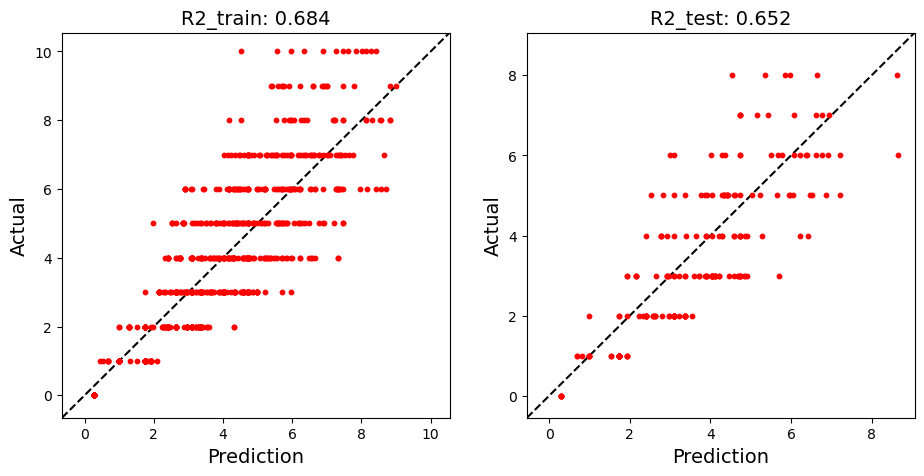

In [5]:
for i in os.listdir('datamean/'):
    print('Position: ', i.split(',')[0])
    training_modelacc('datamean/'+i)
    print('')

Position:  CB.csv
Epoch 1/100
127/127 [==============================] - 0s 1ms/step - loss: 8.2125
Epoch 2/100
127/127 [==============================] - 0s 1ms/step - loss: 5.6807
Epoch 3/100
127/127 [==============================] - 0s 1ms/step - loss: 4.7061
Epoch 4/100
127/127 [==============================] - 0s 1ms/step - loss: 4.4095
Epoch 5/100
127/127 [==============================] - 0s 1ms/step - loss: 4.2797
Epoch 6/100
127/127 [==============================] - 0s 1ms/step - loss: 4.1857
Epoch 7/100
127/127 [==============================] - 0s 942us/step - loss: 4.1133
Epoch 8/100
127/127 [==============================] - 0s 1ms/step - loss: 4.0357
Epoch 9/100
127/127 [==============================] - 0s 1ms/step - loss: 3.9598
Epoch 10/100
127/127 [==============================] - 0s 981us/step - loss: 3.8912
Epoch 11/100
127/127 [==============================] - 0s 974us/step - loss: 3.8269
Epoch 12/100
127/127 [==============================] - 0s 1ms/step - lo

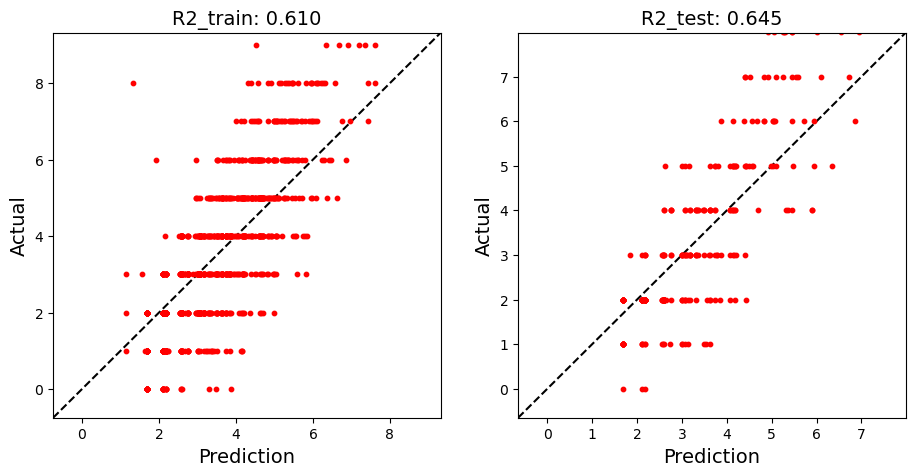


Position:  LB.csv
Epoch 1/100
139/139 [==============================] - 0s 1ms/step - loss: 14.9549
Epoch 2/100
139/139 [==============================] - 0s 1ms/step - loss: 10.0453
Epoch 3/100
139/139 [==============================] - 0s 932us/step - loss: 6.9705
Epoch 4/100
139/139 [==============================] - 0s 1ms/step - loss: 5.5268
Epoch 5/100
139/139 [==============================] - 0s 998us/step - loss: 4.9479
Epoch 6/100
139/139 [==============================] - 0s 1ms/step - loss: 4.6735
Epoch 7/100
139/139 [==============================] - 0s 959us/step - loss: 4.4921
Epoch 8/100
139/139 [==============================] - 0s 1ms/step - loss: 4.3480
Epoch 9/100
139/139 [==============================] - 0s 940us/step - loss: 4.2378
Epoch 10/100
139/139 [==============================] - 0s 985us/step - loss: 4.1381
Epoch 11/100
139/139 [==============================] - 0s 1ms/step - loss: 4.0431
Epoch 12/100
139/139 [==============================] - 0s 874us/

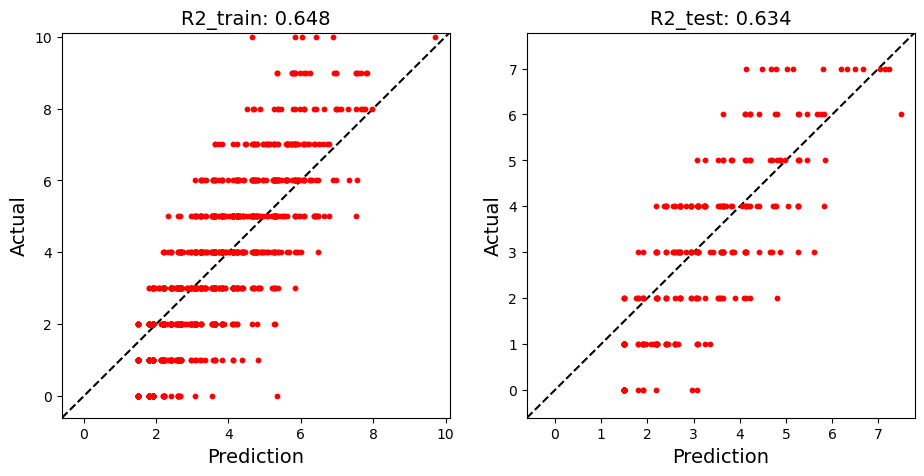


Position:  LW.csv
Epoch 1/100
100/100 [==============================] - 0s 1ms/step - loss: 19.2050
Epoch 2/100
100/100 [==============================] - 0s 1ms/step - loss: 14.5682
Epoch 3/100
100/100 [==============================] - 0s 1ms/step - loss: 11.2020
Epoch 4/100
100/100 [==============================] - 0s 1ms/step - loss: 8.8774
Epoch 5/100
100/100 [==============================] - 1s 6ms/step - loss: 7.3977
Epoch 6/100
100/100 [==============================] - 0s 1ms/step - loss: 6.5208
Epoch 7/100
100/100 [==============================] - 0s 1ms/step - loss: 6.0027
Epoch 8/100
100/100 [==============================] - 0s 1ms/step - loss: 5.6452
Epoch 9/100
100/100 [==============================] - 0s 992us/step - loss: 5.3897
Epoch 10/100
100/100 [==============================] - 0s 997us/step - loss: 5.1932
Epoch 11/100
100/100 [==============================] - 0s 2ms/step - loss: 5.0191
Epoch 12/100
100/100 [==============================] - 0s 2ms/step - 

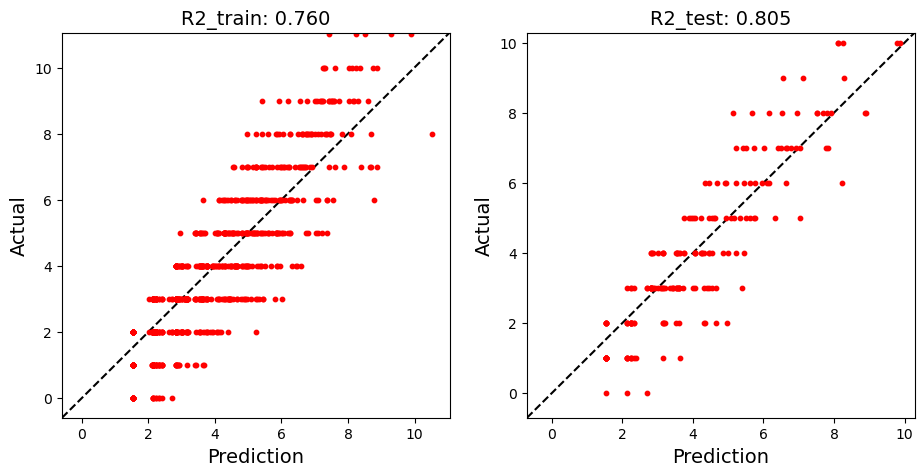


Position:  P.csv
Epoch 1/100
144/144 [==============================] - 1s 1ms/step - loss: 10.1531
Epoch 2/100
144/144 [==============================] - 0s 2ms/step - loss: 5.6771
Epoch 3/100
144/144 [==============================] - 0s 935us/step - loss: 3.4186
Epoch 4/100
144/144 [==============================] - 0s 1ms/step - loss: 2.6922
Epoch 5/100
144/144 [==============================] - 0s 947us/step - loss: 2.4862
Epoch 6/100
144/144 [==============================] - 0s 1ms/step - loss: 2.3754
Epoch 7/100
144/144 [==============================] - 0s 1ms/step - loss: 2.3059
Epoch 8/100
144/144 [==============================] - 0s 1ms/step - loss: 2.2471
Epoch 9/100
144/144 [==============================] - 0s 1ms/step - loss: 2.1989
Epoch 10/100
144/144 [==============================] - 0s 988us/step - loss: 2.1533
Epoch 11/100
144/144 [==============================] - 0s 942us/step - loss: 2.1094
Epoch 12/100
144/144 [==============================] - 0s 1ms/step -

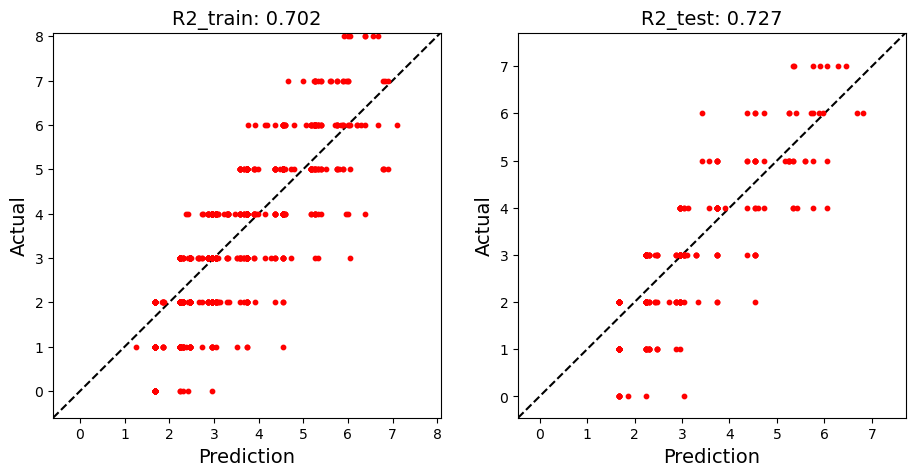


Position:  RB.csv
Epoch 1/100
111/111 [==============================] - 1s 1ms/step - loss: 13.2195
Epoch 2/100
111/111 [==============================] - 0s 1ms/step - loss: 10.0883
Epoch 3/100
111/111 [==============================] - 0s 944us/step - loss: 8.0263
Epoch 4/100
111/111 [==============================] - 0s 1ms/step - loss: 6.9001
Epoch 5/100
111/111 [==============================] - 0s 952us/step - loss: 6.3470
Epoch 6/100
111/111 [==============================] - 0s 1ms/step - loss: 6.0893
Epoch 7/100
111/111 [==============================] - 0s 1ms/step - loss: 5.9202
Epoch 8/100
111/111 [==============================] - 0s 1ms/step - loss: 5.7786
Epoch 9/100
111/111 [==============================] - 0s 1ms/step - loss: 5.6573
Epoch 10/100
111/111 [==============================] - 0s 1ms/step - loss: 5.5494
Epoch 11/100
111/111 [==============================] - 0s 1ms/step - loss: 5.4557
Epoch 12/100
111/111 [==============================] - 0s 1ms/step - l

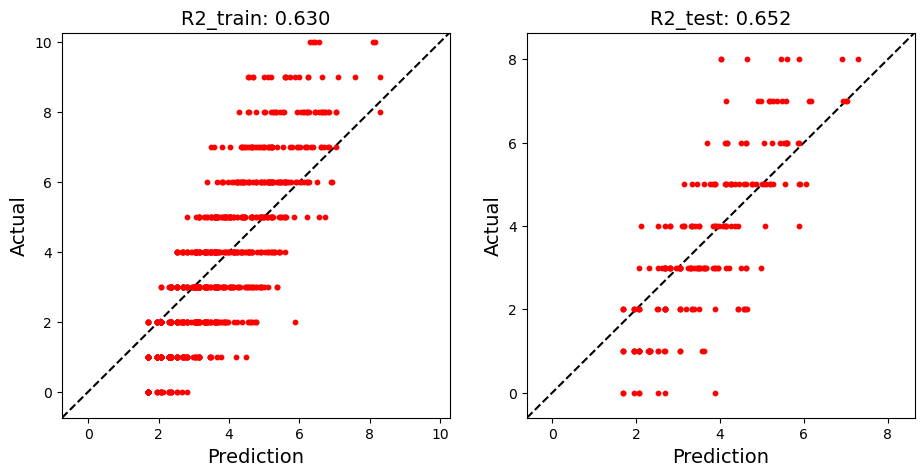


Position:  RW.csv
Epoch 1/100
106/106 [==============================] - 0s 1ms/step - loss: 18.4252
Epoch 2/100
106/106 [==============================] - 0s 1ms/step - loss: 13.4972
Epoch 3/100
106/106 [==============================] - 0s 1ms/step - loss: 10.0132
Epoch 4/100
106/106 [==============================] - 0s 1ms/step - loss: 7.8659
Epoch 5/100
106/106 [==============================] - 0s 1ms/step - loss: 6.6014
Epoch 6/100
106/106 [==============================] - 0s 1ms/step - loss: 5.9746
Epoch 7/100
106/106 [==============================] - 0s 1ms/step - loss: 5.5886
Epoch 8/100
106/106 [==============================] - 0s 1ms/step - loss: 5.3482
Epoch 9/100
106/106 [==============================] - 0s 1ms/step - loss: 5.1542
Epoch 10/100
106/106 [==============================] - 0s 1ms/step - loss: 5.0006
Epoch 11/100
106/106 [==============================] - 0s 1ms/step - loss: 4.8638
Epoch 12/100
106/106 [==============================] - 0s 1ms/step - loss

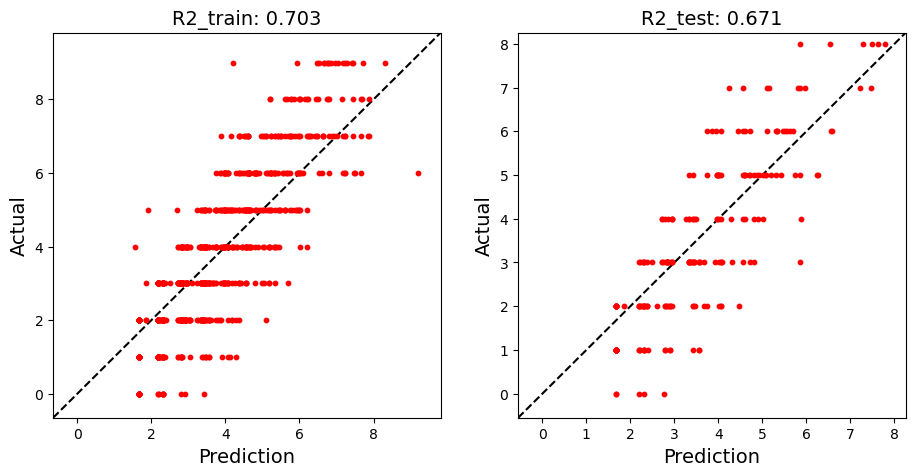

In [6]:
for i in os.listdir('datamean/'):
    print('Position: ', i.split(',')[0])
    training_modelshot('datamean/'+i)
    print('')